In [1]:
from main import *
from visualization import *

import matplotlib as mpl
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['font.size'] = 6
mpl.rcParams['font.family'] = 'Arial'

# Loading required data to make Figure 1

In [2]:
#top_directory = '/media/anleg84/Backup Plus/CERVO/Data/Networks2024/'
top_directory = '/media/anleg84/KINGSTON/Networks2024/'
atlas_path = '/home/anleg84/Documents/Atlas/MapzebrainOld/'

datasets = get_datasets(top_directory, ['920nm', 'wholebrain'])
excluded = np.load('Results/excluded_regions.npy')

atlas = MapzebrainAtlas(atlas_path)
acronyms = list(np.delete(atlas.acronyms, excluded))

folder = datasets[11]
timeseries = np.delete(np.load(folder + 'region_series_dff.npy'), excluded, axis=0)
data = load_data(folder)

palette = generate_n_colors(11, saturation=65, value=90)
palette *= 6

projection_top = np.load('Results/projection_regions_top.npy')
projection_side = np.load('Results/projection_regions_side.npy')

FC = np.load('Results/FC_matrix.npy')
FC_bilat = np.tile(FC, (2, 2))
region_centroids = np.concatenate([atlas.regionCentroids['left'], atlas.regionCentroids['right']], axis=0)
region_centroids[:, 1] = 974 - region_centroids[:, 1]
region_centroids = np.delete(region_centroids, np.concatenate([excluded, np.array(excluded) + 70]), axis=0)

fish_ids = np.load('Data/figure1_fish_ids.npy')
fish_correlations = np.load('Data/figure1_fish_correlations.npy')

mean_similarity = np.load('Results/figure1_mean_similarity.npy')
similarity_same = np.load('Results/figure1_similarity_same.npy')
similarity_different = np.load('Results/figure1_similarity_different.npy')

In [ ]:
region_centroids = np.concatenate([atlas.regionCentroids['left'], atlas.regionCentroids['right']], axis=0)
region_centroids[:, 1] = 974 - region_centroids[:, 1]
region_centroids = np.delete(region_centroids, np.concatenate([excluded, np.array(excluded) + 70]), axis=0)

# Making figure using `PaperFigure`

Leaving blanks for images that are added manually using Inkscape.

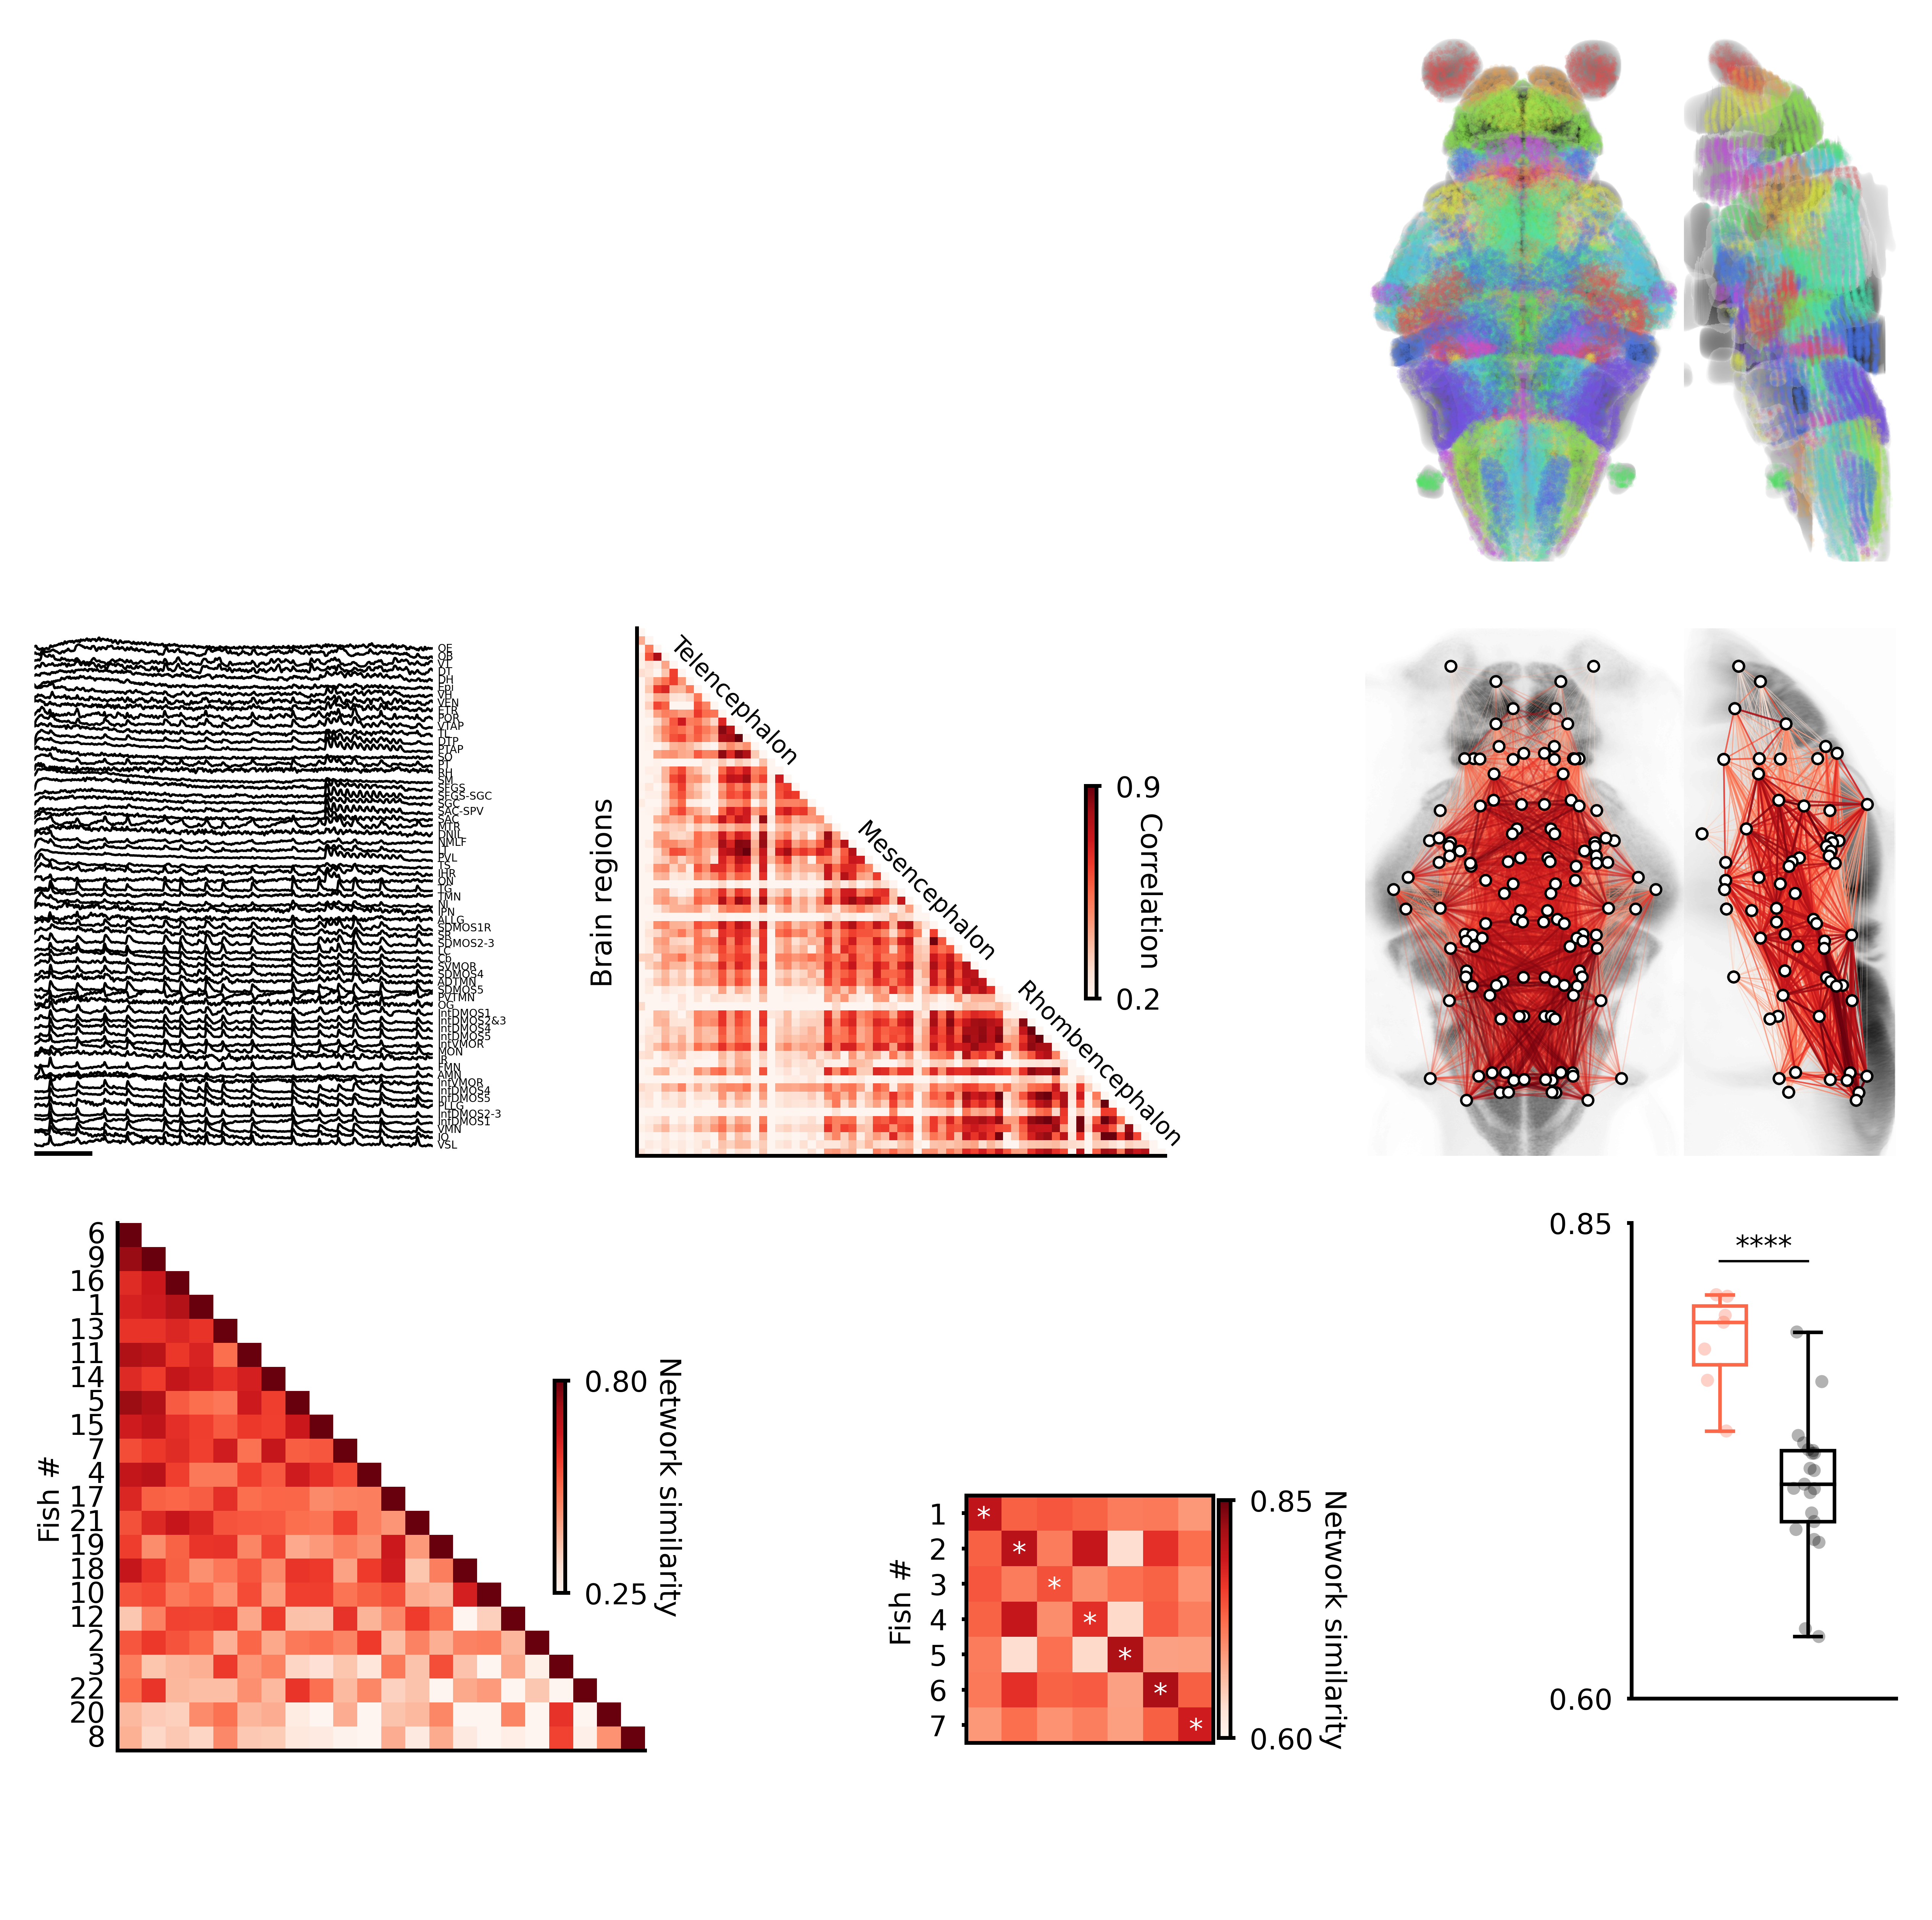

In [61]:
fig = PaperFigure(figsize=(7, 7), dpi=900)

fig.set_tick_length(1)
fig.set_font_size(6)
fig.add_background()

# Setting axes positions -----------------------------------------------------

w = 2
fig.add_axes('scatter_regions_top', (7 - w, 0), 0.6 * w, w)
fig.add_axes('scatter_regions_side', (7 - w + 0.6 * w, 0), 0.4 * w, w)

ypad = 0.25
y = w + ypad
fig.add_axes('regional_traces', (0, y), 1.5, w)
fig.add_axes('FC_matrix', (2, y), w, w)
fig.add_axes('network_top', (7 - w, y), 0.6 * w, w)
fig.add_axes('network_side', (7 - w + 0.6 * w, y), 0.4 * w, w)

fig.add_axes('network_similarity', (0, 2 * (w + ypad)), w, w)
fig.add_axes('fingerprinting', (3.5, 2 * (w + ypad) + w / 2), w/2, w/2)
fig.add_axes('boxplot_similarity', (6, 2 * (w + ypad)), 1, w * 0.9)

# Plotting --------------------------------------------------------------------

ax = fig.axes['scatter_regions_top']
ax.imshow(projection_top, cmap='binary', aspect='auto')
centroids = data['centroids_atlas']
labels = np.delete(np.copy(data['region_labels']), excluded, axis=1)
for i in range(labels.shape[1]):
    ax.scatter(centroids[labels[:, i] != 0, 0], centroids[labels[:, i] != 0, 1], marker='.',
                color=palette[i], edgecolor='none', alpha=0.15, s=4, rasterized=True)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.axis('off')

ax = fig.axes['scatter_regions_side']
ax.imshow(np.rot90(projection_side, k=3), cmap='binary', aspect='auto')
centroids = data['centroids_atlas']
labels = np.delete(np.copy(data['region_labels']), excluded, axis=1)
for i in range(labels.shape[1]):
    ax.scatter(359 - centroids[labels[:, i] != 0, 2], centroids[labels[:, i] != 0, 1],
                marker='.', color=palette[i], edgecolor='none', alpha=0.075, s=4, rasterized=True)
ax.set_xlim([40, 359])
ax.set_ylim([850, 50])
ax.axis('off')

ax = fig.axes['regional_traces']
z = 0
for i in range(timeseries.shape[0]):
    ax.plot(gaussian_filter1d(normalize(timeseries[i]), 1) - 0.5 * z, color='black', linewidth=0.5)
    z += 1
z = 0
for i in range(timeseries.shape[0]):
    ax.text(timeseries.shape[1] + 10, - 0.5 * z, acronyms[i], fontsize=2.25)
    z += 1
ax.set_xlim([0, timeseries.shape[1]])
ax.set_ylim([-32.5, 1.5])
ax.plot([0, 120 * 0.99], [-32.5, -32.5], color='black', linewidth=2)
ax.axis('off')

ax = fig.axes['FC_matrix']
ax.spines[['top', 'right']].set_visible(False)
triangle = np.triu_indices(65, 1)
FC[triangle] = np.nan
cax = ax.imshow(FC, cmap=colormap, vmin=0.2, vmax=0.9)
cbar = plt.colorbar(cax, ax=ax, fraction=0.02, pad=-0.15)
cbar.set_ticks([0.2, 0.9])
cbar.set_label('Correlation', rotation=270, labelpad=0)
ylim = ax.get_ylim()
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([64.4, -0.5])
fontsize = 5
shift = 3
ax.text(shift, 0, 'Telencephalon', fontsize=fontsize, rotation=-45, ha='left', va='top')
ax.text((64/2) + shift, 64 / 2, 'Mesencephalon', fontsize=fontsize, rotation=-45, ha='center', va='center')
ax.text(64+shift, 64, 'Rhombencephalon', fontsize=fontsize, rotation=-45, ha='right', va='bottom')
ax.set_ylabel('Brain regions')

ax = fig.axes['network_top']
percentile = 50
ax.imshow(atlas.XYprojection, cmap='binary', aspect='auto')
draw_graph(ax, FC_bilat, region_centroids, percentile=0, s=5, edge_cmap=colormap, alpha=0.5, edge_vmin=0.2, edge_vmax=0.9, linewidth=0.5,
          node_edgewidth=0.5, rasterized=True)
ax.set_xlim([65, 505])
ax.set_ylim([850, 50])
ax.axis('off')

ax = fig.axes['network_side']
c = np.flip(np.delete(region_centroids, 0, axis=1), axis=1)
c[:, 0] = 359 - c[:, 0]
ax.imshow(np.rot90(atlas.XZprojection, k=3), cmap='binary', vmin=0, aspect='auto')
draw_graph(ax, FC_bilat, c, percentile=0, s=5, edge_cmap=colormap, alpha=0.5, edge_vmin=0.2, edge_vmax=0.9,
          linewidth=0.5, node_edgewidth=0.5, rasterized=True)
ax.set_xlim([40, 359])
ax.set_ylim([850, 50])
ax.axis('off')

ax = fig.axes['network_similarity']
fc = np.copy(fish_correlations)
fc[np.triu_indices(fc.shape[0], 1)] = np.nan
cax = ax.imshow(fc, cmap=colormap, vmin=0.25, vmax=0.8)
for i in range(len(fish_ids)):
    ax.text(-1, i, fish_ids[i].split(' ')[1], ha='right', va='center', fontsize=6)
cbar = plt.colorbar(cax, ax=ax, fraction=0.02, pad=-0.17)
cbar.set_ticks([0.25, 0.8])
cbar.set_label('Network similarity', rotation=270, labelpad=7)
ax.set_xticks([])
ax.set_yticks([])
ax.spines[['top', 'right']].set_visible(False)
ax.text(-3.25, 22/2, 'Fish #', fontsize=6, rotation=90, ha='center', va='center')

ax = fig.axes['fingerprinting']
x = 55
cax = ax.imshow(mean_similarity, cmap=colormap, vmax=0.85, vmin=0.6, extent=[0.5,7.5,7.5,0.5])
cbar = plt.colorbar(cax, ax=ax, fraction=0.045, pad=0.02)
cbar.set_ticks([0.6, 0.85])
cbar.set_label('Network similarity', rotation=270, labelpad=7)
ax.set_xticks([])
ax.set_yticks([1,2,3,4,5,6,7])
ax.text(-1.3, 7/2, 'Fish #', fontsize=6, rotation=90, ha='center', va='center')
for i in range(mean_similarity.shape[0]):
    ax.text(i+1, i+1.15, '*', va='center', ha='center', color='white')

ax = fig.axes['boxplot_similarity']
cmap = plt.cm.get_cmap(colormap)
middle_color = cmap(0.5)
color = mpl.colors.to_rgb(middle_color)
color1, color2 = color, 'black'
ax.scatter(np.random.normal(0.5, 0.05, len(similarity_same)), similarity_same, color=color1, edgecolor='None', alpha=0.3,
           s=7.5, linewidths=1)
bp = ax.boxplot(similarity_same, positions=[0.5], patch_artist=True, widths=0.3)
set_boxplot_color(bp, color1, marker='None', linewidth=0.75)
ax.scatter(np.random.normal(1.0, 0.05, len(similarity_different)), similarity_different, color=color2, edgecolor='None', alpha=0.3,
           s=7.5, linewidths=1)
bp = ax.boxplot(similarity_different, positions=[1.0], patch_artist=True, widths=0.3, whis=[0, 100])
set_boxplot_color(bp, color2, marker='None', linewidth=0.75)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([0.6, 0.85])
ax.set_ylim([0.6, 0.85])
ax.plot([0.5, 1], [0.83, 0.83], linewidth=0.5, color='black')
ax.text(0.75, 0.83, '****', ha='center', va='bottom')

fig.show()

In [62]:
fig.save('/home/anleg84/Documents/Figures/PaperNetworks2024/figure1_incomplete.svg')